In [1]:
import pandas as pd
import numpy as np
from matplotlib import dates as dates, patches as mpatches, pyplot as plt
import seaborn as sns
from plotly import plotly as py, graph_objs  as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

### General Description
We did this project because we were interested in the effectiveness of health inspections and how restaurants respond to a bad health inspection score. We also wanted to explore what kind of violations are the most detrimental to a good score and what violations are the most persistant. Our investigation is important because it allows us to examine how well our current health inspection system is working and also see what kinds of violations are either difficult for restaurants to fix or unwilling to fix. 

**Dataset Description:** 

Restaurants and markets in Los Angeles county are regularly inspected for health code violations. This Dataset includes data on health inspection visits (inspections.csv) and health code violations (violation.csv) from 2015 to 2017 

**Theme**

The subject of this project is to explore How restaurants handle violations in LA. First of all, we pick up what are the worst scoring restaurants in LA. Then, we check those restaurants' scores over time to depict their reaction. Finally, We figure out what violations do these restaurants have trouble fixing and what violations had the greatest impact on score.

## Table of Contents

### 1. Preparing the data.
### 2. Restaurants with the worst initial scores.
### 3. How do low score restaurants respond over time?
### 4. Violations of Restaurants
    A. Frequency of Violations
    B. Score Value of Violations
### 5. Reference


## <center>  Preparing the Data </center>

#### Load data 


In [2]:
df_Ins = pd.read_csv('inspections.csv')
df_Vio = pd.read_csv('violations.csv')

#### Uppercase all names

In [3]:
df_Ins['facility_name'] = df_Ins['facility_name'].str.upper() 
df_Ins.activity_date = pd.to_datetime(df_Ins.activity_date)

#### Merge data

In [4]:
df_merged = pd.merge(df_Ins,df_Vio, on='serial_number', how='left')

#### Getting months and years

In [5]:
df_merged['activity_date'] = pd.to_datetime(df_merged['activity_date'])
df_merged['year'] = df_merged['activity_date'].dt.year
df_merged['month'] = df_merged['activity_date'].dt.month
df_merged.sort_values(by = 'activity_date', ascending = True, inplace = True)

#### Create the order index for later 


In [6]:
df_merged["time"] = df_merged['activity_date'].apply(lambda x:x.strftime('%Y%m')) 

#### Select the columns we want to use.

In [7]:
df_selected = df_merged[['facility_address', 'facility_name', 'facility_city', 'grade', 'score', 'serial_number', 'points',
          'violation_description', 'violation_status','time', 'activity_date', 'year']]

#### Replace the NaN value


In [8]:
df_selected['points'].fillna(0, inplace = True) 
df_selected['violation_description'].fillna('No violation', inplace = True)
df_selected['violation_status'].fillna('No violation', inplace = True)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



##  <center> Restaurants with the worst initial scores </center>

### Research Question 1: What are the worst scoring restaurants in LA?

#### Group by the resturant name and date of inspection

In [9]:
df_visits = df_selected.groupby(by = ['facility_name', 'activity_date']).first()

#### Select the first visit of each restaurant

In [10]:
df_first_visit = df_visits.groupby('facility_name').head(1)

#### Ordering the Restaurants by Score

In [11]:
df_first_visit.reset_index(level = 0, inplace = True)
df_first_visit['score'] = pd.to_numeric(df_first_visit.score)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



#### Select the top 10 worst restaurants

In [12]:
df_first_visit = df_first_visit.sort_values(by = 'score', ascending = True )
df_worst = df_first_visit.head(10)

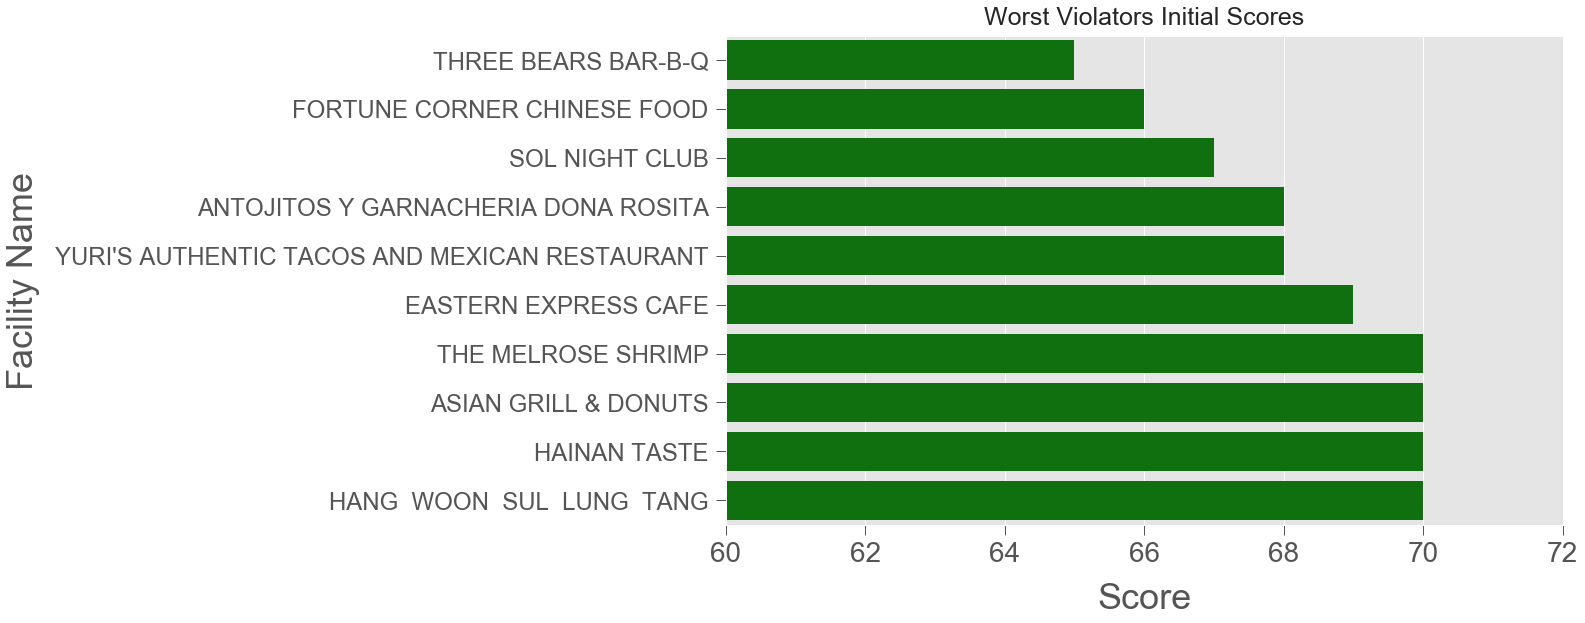

In [46]:
fig, ax = plt.subplots(figsize = (15, 9))
sns.barplot(x = 'score', y = 'facility_name', data = df_worst, color = 'g')
ax.tick_params(axis='x',length = 10.0, labelsize = 28)
ax.tick_params(axis='y',length = 10,  labelsize = 24)
plt.title("Worst Violators Initial Scores", fontsize = 25, y =1.01)
plt.xlabel("Score", fontsize = 36, labelpad = 15)
plt.ylabel("Facility Name", fontsize = 36, labelpad = 15)
plt.xlim(60, 72)
plt.show()

### Insights of Research Question 1:  
THREE BEARS BAR-B-Q got the worst score: **65**

##  <center> How do low score restaurants respond over time? </center>

### Research Question 2: How do resturants respond to bad health inspection scores. Do they improve or do they stay the same? 

#### Plot The Worst Starting Resturants Over Time

In [14]:
init_notebook_mode(connected = True)
trace1 = go.Scatter(
    x = df_merged[df_merged.facility_name =='FORTUNE CORNER CHINESE FOOD'].activity_date,
    y = df_merged[df_merged.facility_name =='FORTUNE CORNER CHINESE FOOD'].score,
    mode = 'lines+markers',
    name = 'FORTUNE CORNER CHINESE FOOD'
)
trace2 = go.Scatter(
    x = df_merged[df_merged.facility_name =='SOL NIGHT CLUB'].activity_date,
    y = df_merged[df_merged.facility_name =='SOL NIGHT CLUB'].score,
    mode = 'lines+markers',
    name = 'SOL NIGHT CLUB'
)
trace3 = go.Scatter(
    x = df_merged[df_merged.facility_name =='THREE BEARS BAR-B-Q'].activity_date,
    y = df_merged[df_merged.facility_name =='THREE BEARS BAR-B-Q'].score,
    mode = 'lines+markers',
    name = 'THREE BEARS BAR-B-Q'
)
trace4 = go.Scatter(
    x = df_merged[df_merged.facility_name =='ANTOJITOS Y GARNACHERIA DONA ROSITA'].activity_date,
    y = df_merged[df_merged.facility_name =='ANTOJITOS Y GARNACHERIA DONA ROSITA'].score,
    mode = 'lines+markers',
    name = 'ANTOJITOS Y GARNACHERIA DONA ROSITA'
)
trace5 = go.Scatter(
    x = df_merged[df_merged.facility_name =='EASTERN EXPRESS CAFE'].activity_date,
    y = df_merged[df_merged.facility_name =='EASTERN EXPRESS CAFE'].score,
    mode = 'lines+markers',
    name = 'EASTERN EXPRESS CAFE'
)
data = [trace1,trace2,trace3,trace4,trace5]
layout = go.Layout(title = 'Worst Violators Over Time',
              xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Score'),
              width = 990,
              height = 500,
              legend = dict(x =.35, y =.1)
              )
fig = dict(data = data, layout = layout)
iplot(fig, filename = 'resturant')

## Insights
1. There seem to be three kinds of responses that restaurants take
    1. put off correcting violations until they have to be inspected
    1. immediatly correct most of the worst violations 
    1. close down because they cannot correct the violations
1. All restaurants just aim for a score of at least 90 and do not improve


## <center> Violations of Restaurants </center>

### Research Question 3: What Violations do these Restaurants have trouble fixing? And What Violations had the greatest impact on score? 

#### Create Subset Focus On Top 5 worst Restaurants and "Losing Point" As Indicator.

In [15]:
df_worst5 = df_merged[(df_merged.facility_name == 'FORTUNE CORNER CHINESE FOOD') | (df_merged.facility_name == 'SOL NIGHT CLUB') | 
    (df_merged.facility_name == 'ANTOJITOS Y GARNACHERIA DONA ROSITA') | (df_merged.facility_name == 'EASTERN EXPRESS CAFE') |
    (df_merged.facility_name == 'THREE BEARS BAR-B-Q')].groupby(['facility_name', 'violation_description']).agg({
    'points':'mean',
    'score':'mean',
    'facility_address': 'count'
}).reset_index(level=['facility_name', 'violation_description'])

df_worst5.columns = ['Restaurant', 'Violation Description', 'Avg_Points', 'Avg_Scores', 'Count']
df_worst5['Losing Point'] = df_worst5.Avg_Points * df_worst5.Count
df_worst5['Violation Description'] = df_worst5['Violation Description'].apply(lambda x: x[6:])

#### Create The Subset of Frequency


In [16]:
df_frequency = df_worst5[['Restaurant', 'Violation Description', 'Count']]

####  Plot Heatmap of Frequency

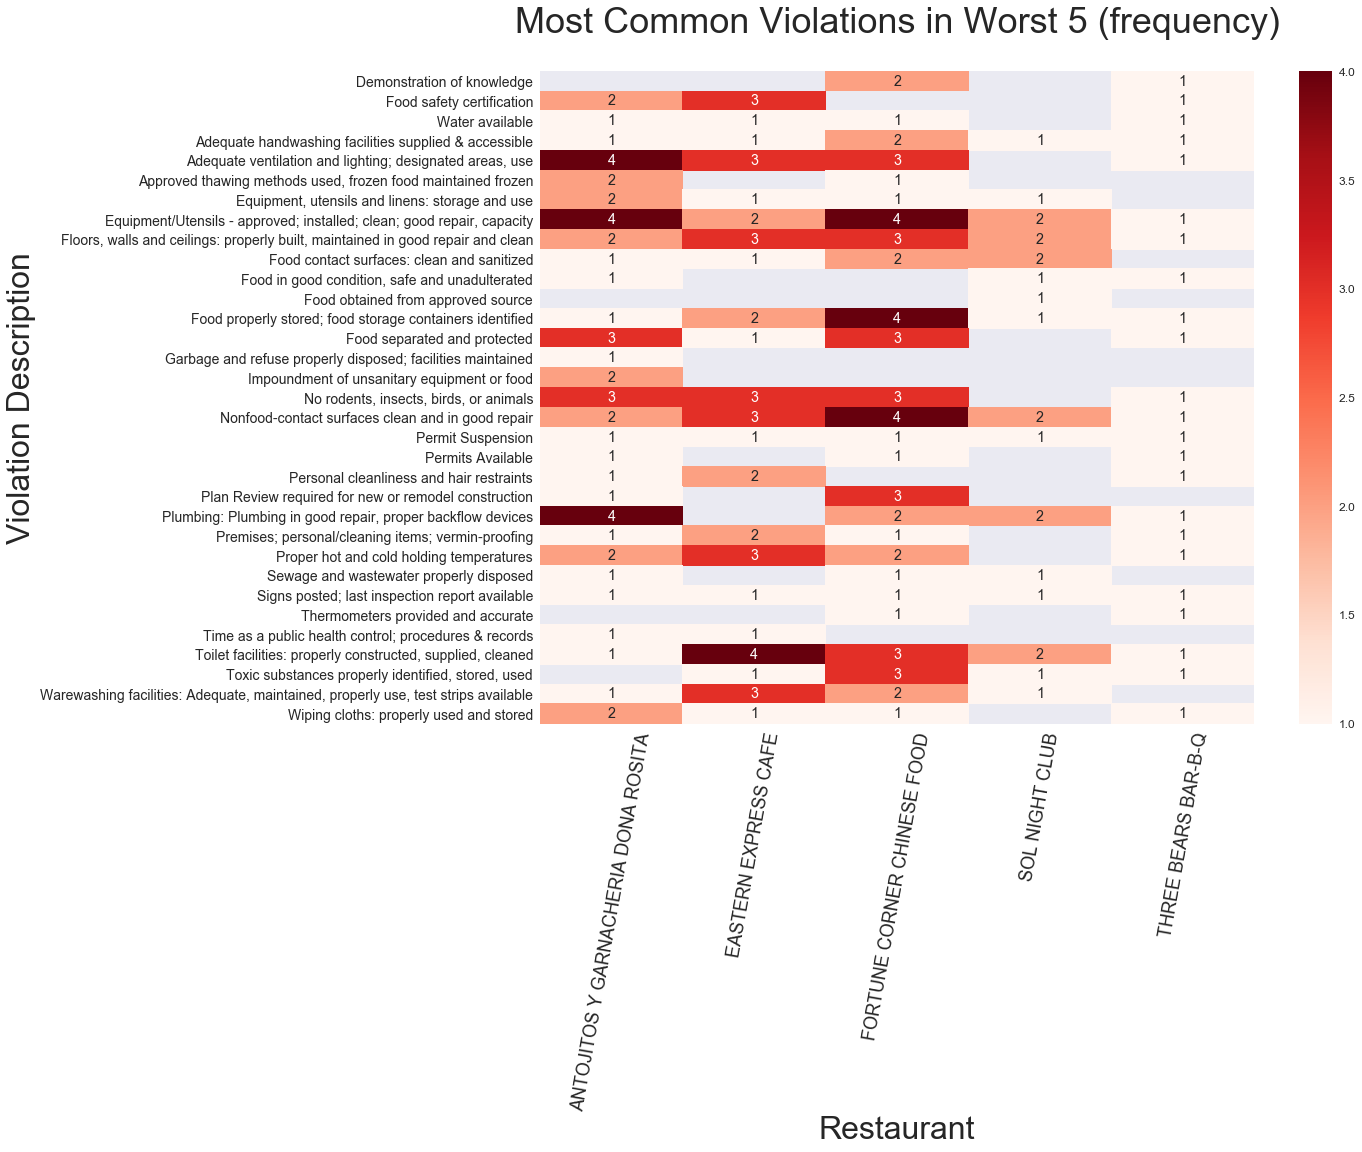

In [51]:
plt.figure(figsize = (16, 12))
sns.set(font_scale = 1.2)
sns.heatmap(df_frequency.pivot(index = 'Violation Description', columns = 'Restaurant', values = 'Count'),  
            annot = True, fmt = "g", cmap = 'Reds')
plt.title('Most Common Violations in Worst 5 (frequency)', fontsize = 36,  y = 1.05)
plt.xlabel('Restaurant', fontsize = 32)
plt.ylabel('Violation Description', fontsize = 32)
plt.xticks(fontsize = 18, rotation = '80')
plt.yticks(fontsize = 14)
plt.show()

#### Create The Subset of Losing Point 

In [18]:
df_losing_point = df_worst5[['Restaurant', 'Violation Description', 'Losing Point']]

####  Plot Heatmap of Losing Point

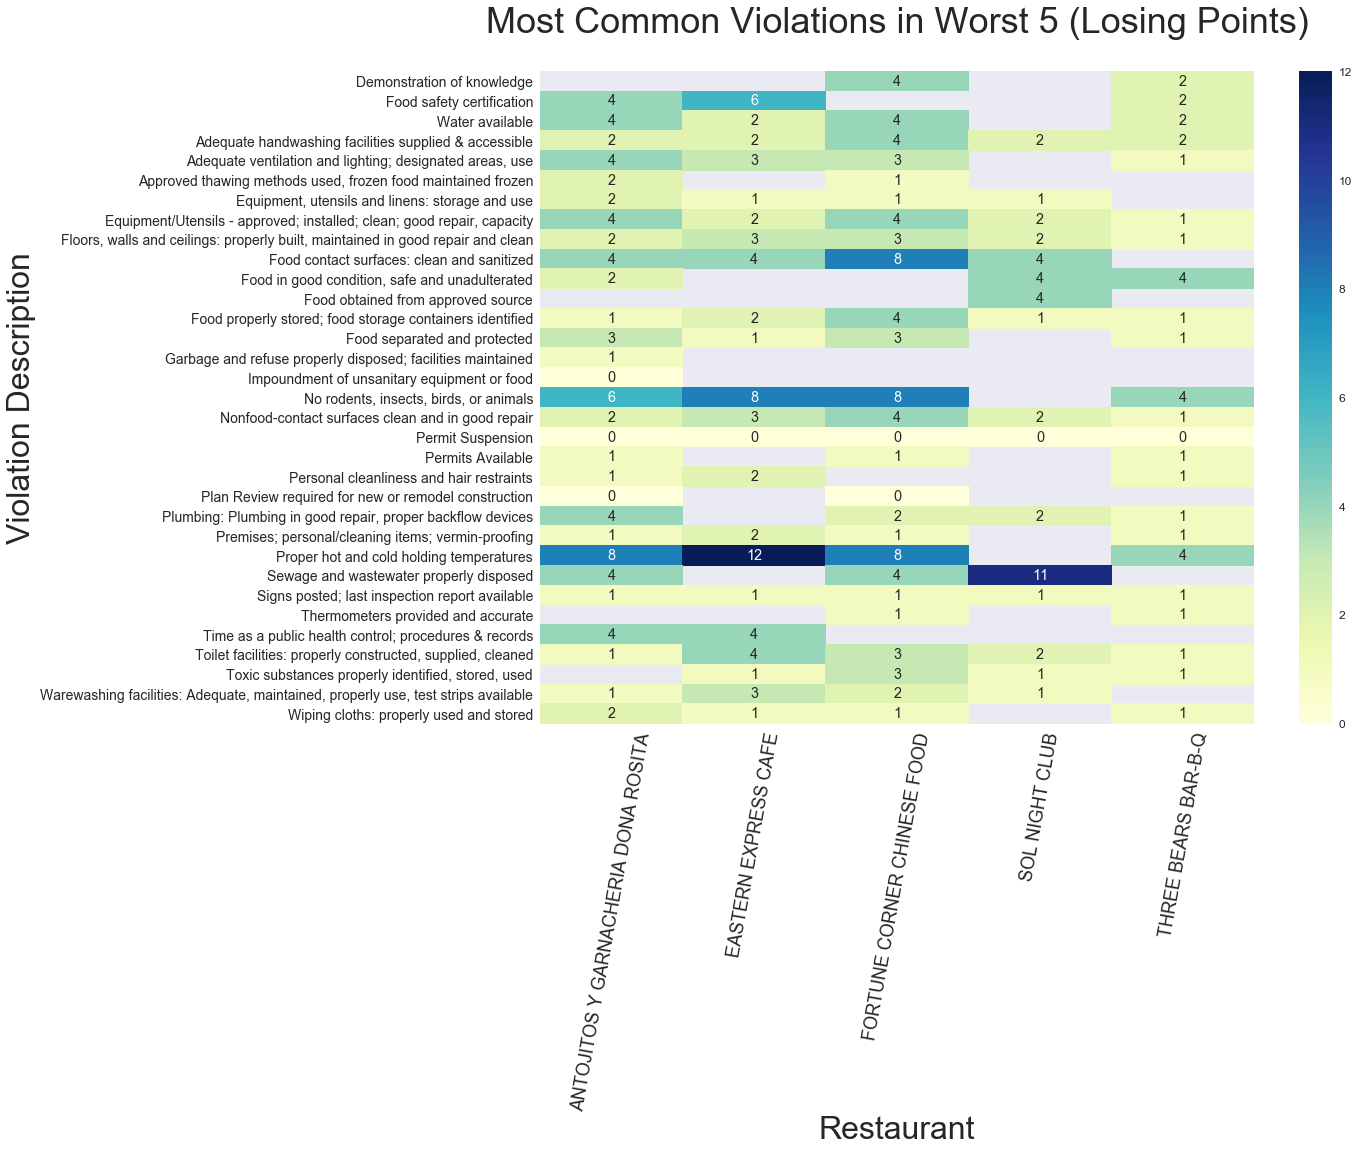

In [19]:
plt.figure(figsize = (16,12))
sns.set(font_scale = 1.2)
sns.heatmap(df_losing_point.pivot(index = 'Violation Description', columns = 'Restaurant', values = 'Losing Point'),  
            annot = True, fmt = "g", cmap = 'YlGnBu')
plt.title('Most Common Violations in Worst 5 (Losing Points)', fontsize = 36,  y = 1.05)
plt.xlabel('Restaurant', fontsize = 32)
plt.ylabel('Violation Description', fontsize= 32)
plt.xticks(fontsize = 18, rotation='80')
plt.yticks(fontsize = 14)
plt.show()

#### Filter Dataframe Based on 50% Metrics (Median) to Optimize The Visualization of Heatmap

In [20]:
#Filter more rows and focus on more frequency & losing points base on 50% metrics
df_median = df_worst5.groupby('Violation Description').sum().reset_index()
df_median.describe().iloc[5, :]

Avg_Points        4.0
Avg_Scores      298.0
Count             5.0
Losing Point      8.0
Name: 50%, dtype: float64

#### Create the Subset to Focus On The Data Over 50% (Median) Count

In [21]:
df_frequency_Median = df_worst5[df_worst5['Violation Description'].isin(df_median[df_median.Count > 5][
    'Violation Description'])][['Restaurant', 'Violation Description', 'Count']]

#### Shrink Dataset to Compare The Data Over 50% (Frequency & Losing Point)

In [22]:
df_Compared_50 = df_worst5[df_worst5['Violation Description'].isin(df_median[df_median.Count > 5][
    'Violation Description']) | df_worst5['Violation Description'].isin(df_median[df_median['Losing Point'] > 8][
    'Violation Description'])]

#### A: Plot Heatmap of Frequency Above Median

<Figure size 1152x720 with 0 Axes>

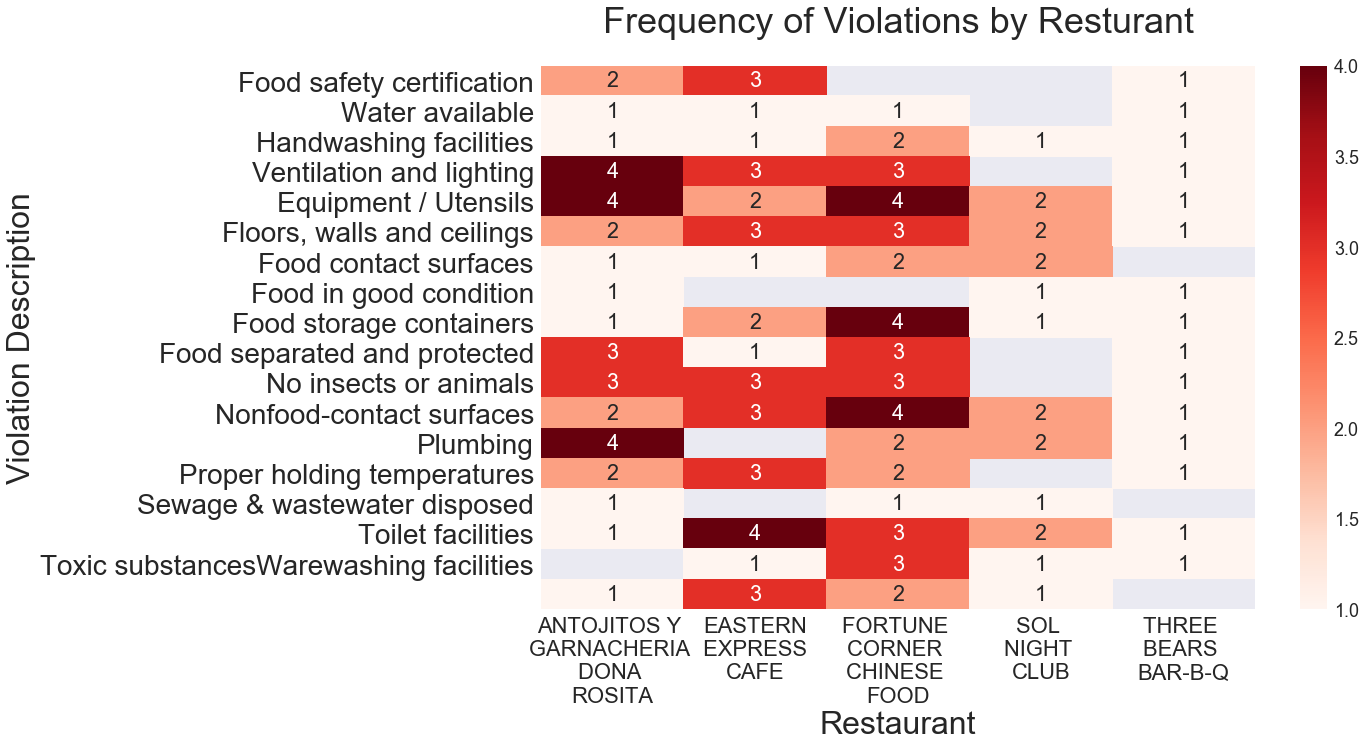

In [50]:
sns.set(font_scale = 1.8)
plt.figure(figsize = (16, 10))
sns.heatmap(df_Compared_50[['Restaurant', 'Violation Description', 'Count']].pivot(index = 'Violation Description',
            columns = 'Restaurant', values = 'Count'), annot = True, fmt = "g", cmap = 'Reds', 
            xticklabels =
            ['ANTOJITOS Y \nGARNACHERIA \nDONA \nROSITA',
             'EASTERN\n EXPRESS \nCAFE',
             'FORTUNE \nCORNER \nCHINESE \nFOOD'
             ,'SOL \nNIGHT \nCLUB',
             'THREE \nBEARS \nBAR-B-Q'], 
            yticklabels = 
            ['Food safety certification',
             'Water available',
             'Handwashing facilities',
             'Ventilation and lighting',
             'Equipment / Utensils',
             'Floors, walls and ceilings',
             'Food contact surfaces',
             'Food in good condition',
             'Food storage containers',
             'Food separated and protected',
             'No insects or animals',
             'Nonfood-contact surfaces',
             'Plumbing',
             'Proper holding temperatures',
             'Sewage & wastewater disposed',
             'Toilet facilities',
             'Toxic substances'
             'Warewashing facilities'
            ])
plt.title('Frequency of Violations by Resturant', fontsize = 36,  y = 1.05)
plt.xlabel('Restaurant', fontsize = 32, y = 0.85)
plt.ylabel('Violation Description', fontsize= 32)

plt.legend(labels = ['1','2','3','4','5'], loc = 2)
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 28)
plt.show()

#### B: Plot Heatmap of Losing Point Above Median

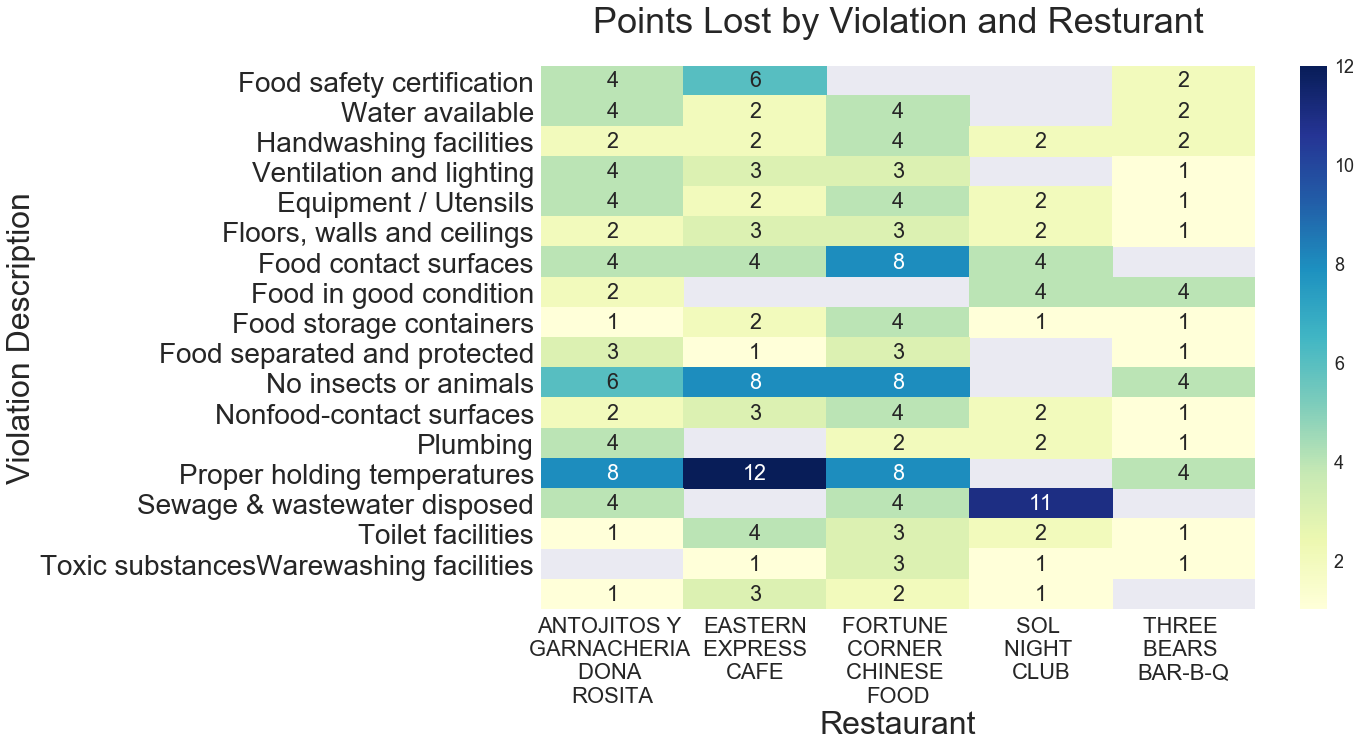

In [24]:
sns.set(font_scale = 1.8)
plt.figure(figsize = (16, 10))
sns.heatmap(df_Compared_50[['Restaurant', 'Violation Description', 'Losing Point']].pivot(index = 'Violation Description',
            columns = 'Restaurant', values = 'Losing Point'), annot = True, fmt = "g", cmap = 'YlGnBu', 
            xticklabels =
            ['ANTOJITOS Y \nGARNACHERIA \nDONA \nROSITA',
             'EASTERN\n EXPRESS \nCAFE',
             'FORTUNE \nCORNER \nCHINESE \nFOOD'
             ,'SOL \nNIGHT \nCLUB',
             'THREE \nBEARS \nBAR-B-Q'], 
            yticklabels = 
            ['Food safety certification',
             'Water available',
             'Handwashing facilities',
             'Ventilation and lighting',
             'Equipment / Utensils',
             'Floors, walls and ceilings',
             'Food contact surfaces',
             'Food in good condition',
             'Food storage containers',
             'Food separated and protected',
             'No insects or animals',
             'Nonfood-contact surfaces',
             'Plumbing',
             'Proper holding temperatures',
             'Sewage & wastewater disposed',
             'Toilet facilities',
             'Toxic substances'
             'Warewashing facilities'
            ])
plt.title('Points Lost by Violation and Resturant', fontsize = 36,  y = 1.05)
plt.xlabel('Restaurant', fontsize = 32, y = 0.85)
plt.ylabel('Violation Description', fontsize= 32)

plt.legend(labels = ['1','2','3','4','5'], loc = 2)
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 28)
plt.show()

### Insights of Research Question 3: 
Comparing heatmaps of the count and point losing, we found the most common violations of the worst are related to the equipment, however, these violations are not the main reason that they lose many points in the inspection. Most of the points that are lost are due to poor termperature for holding foods and pests in the restaurant. If you don't want to have a bad score on your health inspection, you have to focus on having proper temperatures and keeping pests away. 

In addition, we found that: 

1. All resturants have difficulty fixing these violations
    1. Adequate ventiilation and lighting
    1. Equipment and utensils are not clean/repaired/approved
    1. There are rodents, insects, birds, or animals
1. Individual restaurants have different issues with other violations
    1. Antojitos has issues fixing their plumbing 
    2. Eastern Express Cafe has issues with toilet facilities
    3. Fortune Corner has issues with damaged non-food contact surfaces and food storage

## <center> Reference </center>

### Extra Question 1: What are the most common health code violations for losing points?

#### Aggregate Data Based on Violation Description

In [25]:
df_Agg_Violation = df_merged.groupby(['violation_description']).agg({
    'points':'mean',
    'facility_address':'count'
})

#### Create The Losing Point Column As Metrics to Evaluate the Losing Points of Inspection 

In [26]:
df_Agg_Violation['Losing_Points'] = df_Agg_Violation.points * df_Agg_Violation.facility_address

#### Data Cleaning

In [27]:
df_Agg_Violation.columns = ['Avg_points', 'Count', 'Losing_Points']
df_Agg_Violation = df_Agg_Violation[(df_Agg_Violation.Avg_points > 0) & (
    df_Agg_Violation.Losing_Points.nlargest(10))].reset_index()
df_Agg_Violation = df_Agg_Violation.sort_values(by = 'Losing_Points', ascending = False)
df_Agg_Violation['violation_description'] = df_Agg_Violation['violation_description'].apply(lambda x: x[6:])

### Insights of Extra Question 1: 
We surprisingly found that the most common violation of restaurants is related to temperature (shown as below). Be careful about temperature if you running a restaurant. 

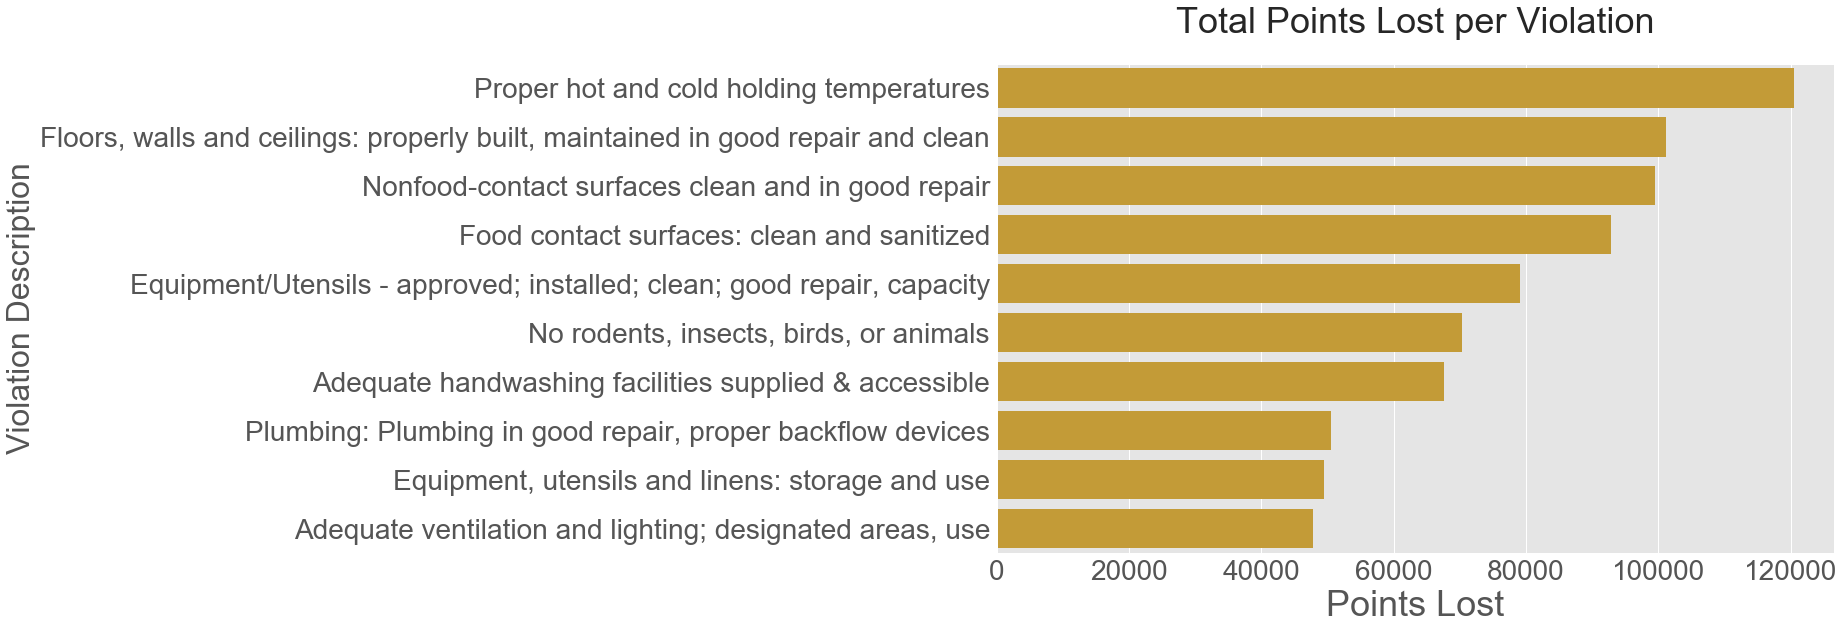

In [48]:
fig, ax = plt.subplots(figsize=(15, 9))
sns.barplot(x = 'Losing_Points', y = 'violation_description', data = df_Agg_Violation, ax = ax, color = 'goldenrod')
plt.title('Total Points Lost per Violation',fontsize = 36, y = 1.05 )
plt.xlabel('Points Lost',fontsize = 36)
plt.ylabel('Violation Description', fontsize = 32)
plt.xticks(fontsize = 28)
plt.yticks(fontsize = 28)
plt.show();

### Extra Question 2: What is the trend of health code violations over time?

#### Aggregate Data Based on Violation Time

In [29]:
df_trend = df_merged.groupby(['time']).agg({
    'score':'mean',
    'points' : 'mean'
}).dropna().sort_index().reset_index()

#### Set Average Score As The Benchmark 

In [30]:
df_trend['mean'] = df_trend.score.mean()

#### Clean Data and Set Index

In [31]:
df_trend['time'] = df_trend['time'].apply(lambda x: x[4:]) + '/' + df_trend['time'].apply(lambda x: x[2:4])

### Insights of Extra Question 2:
As we can see from the graph above, the performance of 2016 is better than other years. The scores for 2016 are higher than the average.

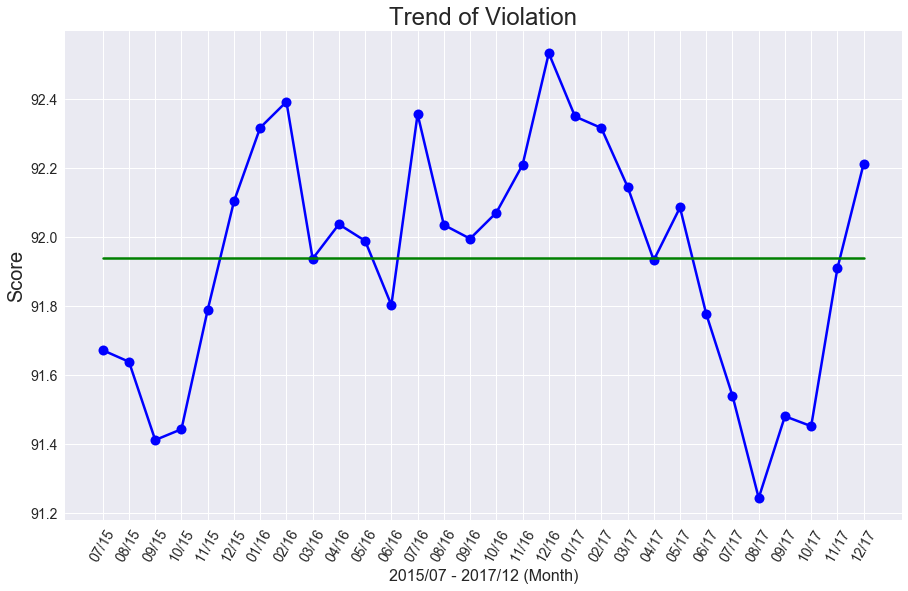

In [32]:
fig, ax = plt.subplots(figsize = (15, 9))
plt.style.use('ggplot')
plt.plot( 'score', data = df_trend, marker = 'o', markerfacecolor = 'blue', markersize = 10, 
         color = 'blue', linewidth=2.5)
plt.plot( 'time', 'mean', data = df_trend, marker = '+', markerfacecolor = 'green', markersize = 10, 
         color = 'green', linewidth=2.5)
plt.title('Trend of Violation',fontsize = 24)
plt.xlabel('2015/07 - 2017/12 (Month)',fontsize = 16)
plt.ylabel('Score', fontsize=20)
plt.xticks(df_trend.index, df_trend.time, fontsize=14, rotation = '60')
plt.yticks(fontsize = 14)
plt.show();